In [1]:
import numpy as np
import pandas as pd
from missingpy import KNNImputer

/Users/romainilbert/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df= pd.read_csv('/Users/romainilbert/Desktop/ENSAE/2A/STATAP/dBFin.csv', sep=';')
df.head()

,Date,crédits/dépôts,cours/valeur banques,rentabilité capitaux propres,rentabilité actifs,actifs bancaires consolidés,actifs des GSIB,inflation,Balance budgétaire Fr,Solde des transactions courantes Fr,CAC total return index,Eurostoxx total return index,CAC index,Eurostoxx Index,CAC financier,CAC biens consommation,CAC pétrole/gaz,Levier bancaire
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.7,-1.5,1.41,NaN,NaN,NaN,NaN,692.40,980.46,581.36,NaN
1,01/01/2001,NaN,NaN,NaN,NaN,NaN,NaN,1.3,-1.5,1.71,8369.56,990.88,5823.41,4727.71,817.72,898.07,710.56,NaN
2,01/01/2002,NaN,NaN,NaN,NaN,NaN,NaN,2.4,-3.1,1.21,6623.75,786.57,4513.99,3684.86,697.27,736.25,730.92,NaN
3,01/01/2003,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-4.1,0.70,4584.13,520.22,3040.32,2376.97,544.71,630.29,593.82,NaN
4,01/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,2.2,-3.6,0.53,5661.31,639.67,3636.94,2842.86,707.51,830.95,670.41,NaN


In [3]:
df

,Date,crédits/dépôts,cours/valeur banques,rentabilité capitaux propres,rentabilité actifs,actifs bancaires consolidés,actifs des GSIB,inflation,Balance budgétaire Fr,Solde des transactions courantes Fr,CAC total return index,Eurostoxx total return index,CAC index,Eurostoxx Index,CAC financier,CAC biens consommation,CAC pétrole/gaz,Levier bancaire
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.7,-1.5,1.41,NaN,NaN,NaN,NaN,692.40,980.46,581.36,NaN
1,01/01/2001,NaN,NaN,NaN,NaN,NaN,NaN,1.3,-1.5,1.71,8369.56,990.88,5823.41,4727.71,817.72,898.07,710.56,NaN
2,01/01/2002,NaN,NaN,NaN,NaN,NaN,NaN,2.4,-3.1,1.21,6623.75,786.57,4513.99,3684.86,697.27,736.25,730.92,NaN
3,01/01/2003,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-4.1,0.70,4584.13,520.22,3040.32,2376.97,544.71,630.29,593.82,NaN
4,01/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,2.2,-3.6,0.53,5661.31,639.67,3636.94,2842.86,707.51,830.95,670.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,01/12/2015,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,11081.90,1176.56,4665.66,3288.63,827.80,2007.11,779.67,NaN
236,01/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,11751.36,1193.40,4764.49,3207.27,856.63,2172.80,872.29,NaN
237,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,13674.99,1370.68,5372.98,3564.66,971.43,2705.47,859.35,NaN
238,01/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,12616.09,1217.95,4798.21,3057.84,728.23,2603.96,849.10,NaN


Notre dataframe contient 240 dates différentes. Chaque ligne correspondant à une date. Chaque colonne correspond à une variable économique. On remarque que le nombre de données manquantes est fortement élevé.

In [4]:
df_=df.drop(columns="Date")

In [5]:
df_

,crédits/dépôts,cours/valeur banques,rentabilité capitaux propres,rentabilité actifs,actifs bancaires consolidés,actifs des GSIB,inflation,Balance budgétaire Fr,Solde des transactions courantes Fr,CAC total return index,Eurostoxx total return index,CAC index,Eurostoxx Index,CAC financier,CAC biens consommation,CAC pétrole/gaz,Levier bancaire
0,NaN,NaN,NaN,NaN,NaN,NaN,1.7,-1.5,1.41,NaN,NaN,NaN,NaN,692.40,980.46,581.36,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.3,-1.5,1.71,8369.56,990.88,5823.41,4727.71,817.72,898.07,710.56,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,2.4,-3.1,1.21,6623.75,786.57,4513.99,3684.86,697.27,736.25,730.92,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-4.1,0.70,4584.13,520.22,3040.32,2376.97,544.71,630.29,593.82,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.2,-3.6,0.53,5661.31,639.67,3636.94,2842.86,707.51,830.95,670.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,11081.90,1176.56,4665.66,3288.63,827.80,2007.11,779.67,NaN
236,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,11751.36,1193.40,4764.49,3207.27,856.63,2172.80,872.29,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,13674.99,1370.68,5372.98,3564.66,971.43,2705.47,859.35,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,12616.09,1217.95,4798.21,3057.84,728.23,2603.96,849.10,NaN


In [6]:
valeurs_manquantes=np.count_nonzero(df_.isnull().values)/(240*17)
valeurs_manquantes

0.5245098039215687

Il y a en moyenne 52% de valeurs manquantes dans notre matrice.

In [7]:
for columns in df_ :
    print(np.count_nonzero(df_[:][columns].isnull().values)/240)

0.95
0.9416666666666667
0.9458333333333333
0.9458333333333333
0.9583333333333334
0.9416666666666667
0.029166666666666667
0.9208333333333333
0.9208333333333333
0.07916666666666666
0.07916666666666666
0.07916666666666666
0.07916666666666666
0.029166666666666667
0.029166666666666667
0.029166666666666667
0.9583333333333334


La disparité des valeurs manquantes est importante selon les colonnes, certaines étant à 7% de données manquantes et d'autres à 96%.

Afin de combler le vide laissé par ces valeurs manquantes, nous effectuons une approche k-nn, avec un nombre maximal de missing value fixé à 96% comme nous venons de le voir. Nous fixons des poids uniformes pour chacune des variables, un nombre de voisins fixé à 2, et la distance euclidienne traditionnelle. La valeur manquante sera ainsi imputée par la moyenne des valeurs des deux plus proches voisins.

In [8]:
from sklearn import preprocessing
M=np.array(df_)
M = preprocessing.scale(M)
imputer=KNNImputer(missing_values="NaN", n_neighbors=2, weights="uniform", 
                 metric="masked_euclidean", row_max_missing=0.90, 
                 col_max_missing=0.96, copy=True)
df_remplie=imputer.fit_transform(M)
df_remplie

/Users/romainilbert/opt/anaconda3/lib/python3.7/site-packages/missingpy/knnimpute.py:224: UserWarning: There are rows with more than 90.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
/Users/romainilbert/opt/anaconda3/lib/python3.7/site-packages/missingpy/knnimpute.py:282: UserWarning: There are rows with more than 90.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
/Users/romainilbert/opt/anaconda3/lib/python3.7/site-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/Users/romainilbert/opt/anaconda3/lib/python3.7/site-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_d

array([[-9.68025123e-01,  7.49993161e-01, -2.36483379e-01, ...,
        -6.05213336e-01, -1.96538068e+00,  5.12799347e-01],
       [ 6.88390964e-02,  1.83951545e+00,  1.92199534e+00, ...,
        -7.33957287e-01, -9.19957889e-01,  8.80639062e-01],
       [ 1.61490327e-01,  3.41764463e-01, -4.70982821e-01, ...,
        -9.86819844e-01, -7.55214793e-01, -5.86815062e-01],
       ...,
       [-9.84771142e-01, -6.76555995e-01, -1.33548802e-01, ...,
         2.09031528e+00,  2.83977540e-01,  1.30065667e+00],
       [-9.84771142e-01, -6.76555995e-01, -1.33548802e-01, ...,
         1.93169411e+00,  2.01039586e-01,  1.30065667e+00],
       [-4.81096644e-16,  6.34413157e-17, -2.39124959e-16, ...,
        -1.84878341e-16, -6.30873513e-16,  9.10382880e-16]])

In [9]:
df_remplie.shape

(240, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2002f990>,
      dtype=object)

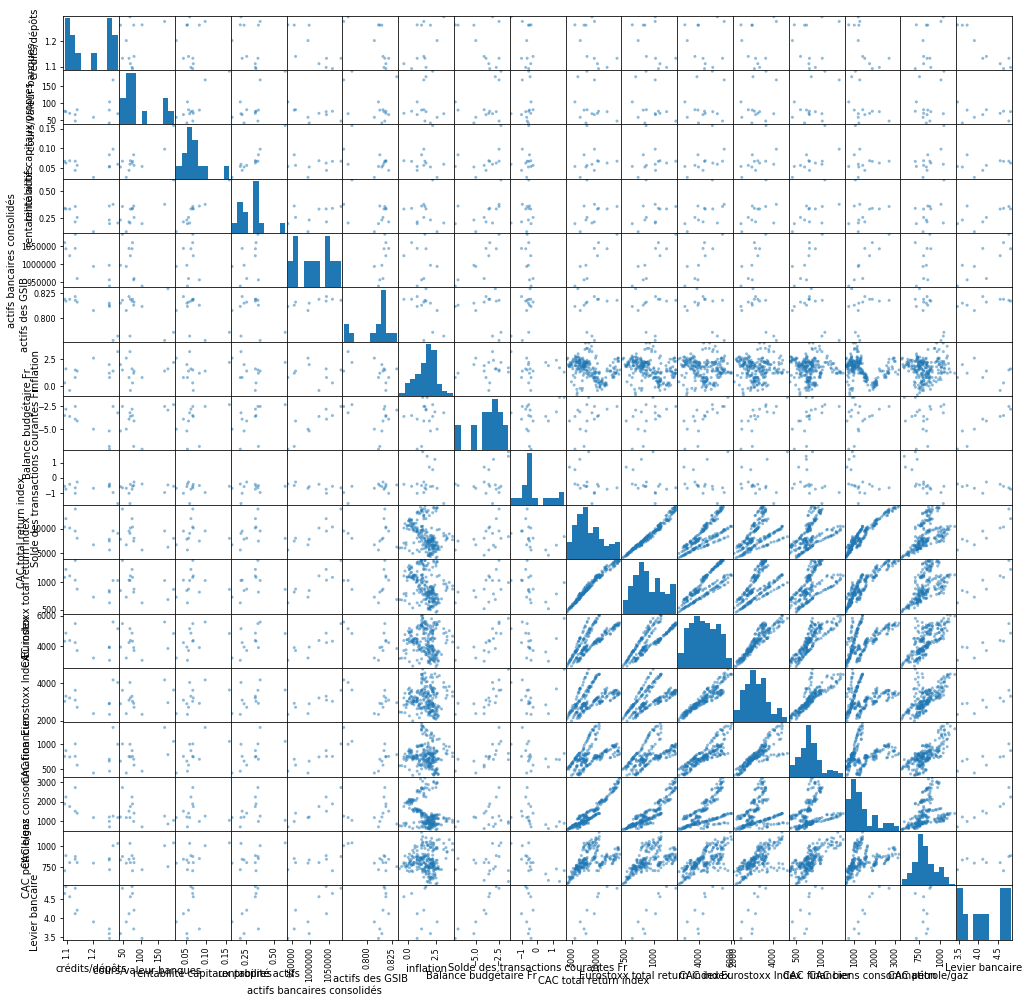

In [10]:
pd.plotting.scatter_matrix(df_,figsize=(17, 17))

A travers cette approche, on remarque que les variables financières sont particulièrement corrélées entre elles. nous les avons volontairement laissées dans la dataframe afin de leur donner plus de poids, la bourse étant un vecteur important de la santé économique.

Nous souhaitons à présent séparer notre df_remplie en différents clusters de date. Nous mettons le nombre de clusters à 9 car c'est ce qu'a fait la banque de France.

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9).fit(df_remplie)
centroids = kmeans.cluster_centers_
print(centroids)
data=kmeans.labels_
data

[[ 0.74891508  0.57849215 -0.22870857 -0.28499811 -0.67148774  0.8029783
   0.59841757  0.12796448  0.25887025 -0.92423338 -0.95297294 -0.54670623
  -0.29487412 -0.20369742 -0.81282311 -0.60636701 -0.97881091]
 [-1.04230361 -0.46311647 -0.23082718  0.04261731  0.60784664  0.64241235
  -1.40120935  0.04677734 -0.46570691  0.76357739  0.84401932  0.23954048
   0.05493271  0.00954086  0.75969895  0.14117591  0.66548464]
 [ 1.22848679  1.57793809  1.65779476  1.33328014  0.88947045 -1.81775162
   0.11439372  0.79584364 -0.63085918  0.28288677  0.41399319  1.44806608
   1.69020024  2.14244441 -0.19224036  1.70819195  0.93126507]
 [ 0.17643965 -0.46277028 -0.33761638 -0.36087458 -0.59647719  0.29445687
   0.0945385  -0.78585694 -0.28209319 -0.28088956 -0.30451595 -0.56496273
  -0.6059479  -0.65715039 -0.14524979 -0.11680479 -0.50150194]
 [-0.98477114 -0.676556   -0.1335488   0.3736188   1.15588596  0.52145928
  -0.05185398  0.66349327 -0.56512749  1.84780301  1.68621241  1.13379767
   0.4785

array([8, 2, 5, 8, 0, 0, 2, 2, 6, 7, 3, 3, 3, 3, 1, 1, 1, 4, 4, 4, 5, 5,
       5, 8, 0, 0, 2, 2, 6, 7, 3, 3, 3, 3, 1, 4, 1, 4, 4, 4, 5, 5, 0, 8,
       0, 6, 6, 2, 6, 7, 3, 3, 3, 3, 1, 1, 1, 4, 4, 3, 5, 0, 8, 8, 0, 6,
       2, 2, 0, 7, 3, 8, 3, 3, 1, 1, 1, 4, 4, 3, 5, 5, 0, 8, 0, 0, 2, 2,
       6, 7, 3, 3, 3, 3, 3, 1, 1, 4, 4, 4, 0, 5, 5, 8, 0, 0, 2, 2, 6, 7,
       3, 3, 3, 3, 1, 1, 1, 4, 4, 4, 5, 5, 0, 8, 0, 0, 2, 2, 6, 7, 3, 3,
       8, 3, 1, 1, 1, 4, 4, 4, 5, 5, 0, 8, 0, 3, 6, 2, 6, 7, 3, 3, 8, 3,
       1, 1, 1, 4, 4, 3, 5, 5, 8, 8, 0, 6, 2, 2, 6, 7, 0, 8, 3, 3, 1, 1,
       1, 4, 4, 3, 5, 0, 8, 8, 0, 6, 2, 2, 0, 7, 3, 8, 3, 3, 1, 1, 1, 4,
       4, 3, 5, 5, 8, 8, 0, 6, 2, 2, 8, 3, 3, 8, 3, 1, 1, 1, 1, 4, 4, 3,
       5, 5, 8, 8, 0, 6, 2, 2, 7, 3, 3, 8, 3, 1, 1, 1, 1, 4, 4, 3],
      dtype=int32)

In [12]:
data=pd.DataFrame(data)

In [13]:
data

,0
0,8
1,2
2,5
3,8
4,0
...,...
235,1
236,1
237,4
238,4


In [14]:
data.columns = ['Clusters']

In [15]:
data

,Clusters
0,8
1,2
2,5
3,8
4,0
...,...
235,1
236,1
237,4
238,4


In [16]:
df.Date

0      01/01/2000
1      01/01/2001
2      01/01/2002
3      01/01/2003
4      01/01/2004
          ...    
235    01/12/2015
236    01/12/2016
237    01/12/2017
238    01/12/2018
239    01/12/2019
Name: Date, Length: 240, dtype: object

In [17]:
data.Clusters

0      8
1      2
2      5
3      8
4      0
      ..
235    1
236    1
237    4
238    4
239    3
Name: Clusters, Length: 240, dtype: int32

In [18]:
df['Clusters']=data.Clusters
df

,Date,crédits/dépôts,cours/valeur banques,rentabilité capitaux propres,rentabilité actifs,actifs bancaires consolidés,actifs des GSIB,inflation,Balance budgétaire Fr,Solde des transactions courantes Fr,CAC total return index,Eurostoxx total return index,CAC index,Eurostoxx Index,CAC financier,CAC biens consommation,CAC pétrole/gaz,Levier bancaire,Clusters
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.7,-1.5,1.41,NaN,NaN,NaN,NaN,692.40,980.46,581.36,NaN,8
1,01/01/2001,NaN,NaN,NaN,NaN,NaN,NaN,1.3,-1.5,1.71,8369.56,990.88,5823.41,4727.71,817.72,898.07,710.56,NaN,2
2,01/01/2002,NaN,NaN,NaN,NaN,NaN,NaN,2.4,-3.1,1.21,6623.75,786.57,4513.99,3684.86,697.27,736.25,730.92,NaN,5
3,01/01/2003,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-4.1,0.70,4584.13,520.22,3040.32,2376.97,544.71,630.29,593.82,NaN,8
4,01/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,2.2,-3.6,0.53,5661.31,639.67,3636.94,2842.86,707.51,830.95,670.41,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,01/12/2015,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,11081.90,1176.56,4665.66,3288.63,827.80,2007.11,779.67,NaN,1
236,01/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,11751.36,1193.40,4764.49,3207.27,856.63,2172.80,872.29,NaN,1
237,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,13674.99,1370.68,5372.98,3564.66,971.43,2705.47,859.35,NaN,4
238,01/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,12616.09,1217.95,4798.21,3057.84,728.23,2603.96,849.10,NaN,4


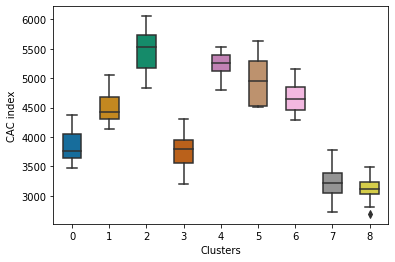

In [19]:
import seaborn as sns
bplot = sns.boxplot(y='CAC index', x='Clusters', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

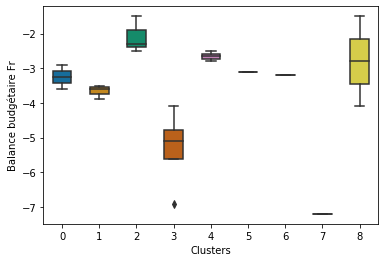

In [20]:
import seaborn as sns
bplot = sns.boxplot(y='Balance budgétaire Fr', x='Clusters', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

En se basant sur le CAC40, on remarque que les clusters 2,4 témoignent d'une bonne santé économique, à l'inverse des clusters 7 et 8.

In [24]:
import datetime
df['Date2']=pd.to_datetime(df.Date)
df.sort_values(by=['Date2'],inplace=True)
df

,Date,crédits/dépôts,cours/valeur banques,rentabilité capitaux propres,rentabilité actifs,actifs bancaires consolidés,actifs des GSIB,inflation,Balance budgétaire Fr,Solde des transactions courantes Fr,CAC total return index,Eurostoxx total return index,CAC index,Eurostoxx Index,CAC financier,CAC biens consommation,CAC pétrole/gaz,Levier bancaire,Clusters,Date2
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.7,-1.5,1.41,NaN,NaN,NaN,NaN,692.40,980.46,581.36,NaN,8,2000-01-01
80,01/02/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,673.46,910.48,631.90,NaN,5,2000-01-02
100,01/03/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,684.61,904.88,666.50,NaN,0,2000-01-03
20,01/04/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,749.44,967.38,724.54,NaN,5,2000-01-04
120,01/05/2000,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,767.15,1007.09,753.18,NaN,5,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,01/08/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019-01-08
199,01/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019-01-09
79,01/10/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019-01-10
219,01/11/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019-01-11


In [28]:
import plotly.graph_objects as go
print( list(df['Date'].to_string()))
fig = go.Figure(data=go.Scatter(x= df.Date,
                                y=df['Clusters'],
                                mode='markers',
                                marker_color=df['Clusters'],
                                text=pd.to_datetime(df['Date']))) # hover text goes here
fig.update_layout(title='')

['0', ' ', ' ', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '1', '/', '2', '0', '0', '0', '\n', '8', '0', ' ', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '2', '/', '2', '0', '0', '0', '\n', '1', '0', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '3', '/', '2', '0', '0', '0', '\n', '2', '0', ' ', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '4', '/', '2', '0', '0', '0', '\n', '1', '2', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '5', '/', '2', '0', '0', '0', '\n', '1', '4', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '6', '/', '2', '0', '0', '0', '\n', '4', '0', ' ', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '7', '/', '2', '0', '0', '0', '\n', '1', '6', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '8', '/', '2', '0', '0', '0', '\n', '1', '8', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '0', '9', '/', '2', '0', '0', '0', '\n', '6', '0', ' ', ' ', ' ', ' ', ' ', '0', '1', '/', '1', '0', '/', '2', '0', '0', '0', '\n', '2', '0', '0', ' ', ' ', ' ', ' ', '0', '1', '/', '1', '1', '/', '2', '0', '0', '0', '\n'

En comparant les clusters de dates, on remarque une forte corrélation avec la crise économique. En effet, là où le cluster 7 témoigne d'une mauvaise santé économique, en étant formé principalement de dates post-crise économique en 2008, le cluster 3 témoigne d'une reprise face à la crise et, enfin, le cluster 4 d'un mouvement haussier du marché.